In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/dforeman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Generate fake data
n_samples = 20
true_a2, true_a1, true_a0 = 2.1, 2.3, 0.1
x_data = np.random.uniform(size=n_samples)
y_data = x_data*x_data*true_a2 + x_data*true_a1 + true_a0 + np.random.normal(size=n_samples, scale=0.2)

In [3]:
x = tf.placeholder("float")
y = tf.placeholder("float")
a2 = tf.Variable(np.random.randn(), name="a2")
a1 = tf.Variable(np.random.randn(), name="a1")
a0 = tf.Variable(np.random.randn(), name="a0")

model = x*x*a2 + x*a1 + a0
cost = tf.reduce_sum(tf.pow(model - y, 2)) 
print(cost)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

Tensor("Sum:0", dtype=float32)


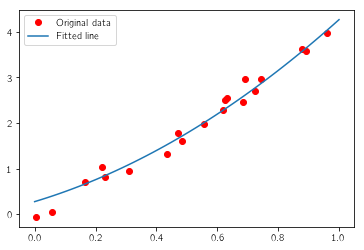

In [4]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(500):
        sess.run(optimizer, feed_dict={x: x_data, y: y_data})
        #print("slope={}, intercept={}".format(sess.run(slope), sess.run(intercept)))

    plt.plot(x_data, y_data, 'ro', label='Original data')
    plx = np.linspace(0, 1)
    plt.plot(plx, sess.run(a2)*plx*plx + sess.run(a1)*plx + sess.run(a0), label='Fitted line')
    plt.legend()
    plt.show()